In [1]:
!wget https://raw.githubusercontent.com/luis-huacho/proyecto-segmentacion-autoetiquetado/refs/heads/master/output/openclip_avocado_labels_1.csv
!wget https://raw.githubusercontent.com/luis-huacho/proyecto-segmentacion-autoetiquetado/refs/heads/master/avocado_dataset/description.xlsx

--2025-06-30 23:27:02--  https://raw.githubusercontent.com/luis-huacho/proyecto-segmentacion-autoetiquetado/refs/heads/master/output/openclip_avocado_labels_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572565 (559K) [text/plain]
Saving to: ‘openclip_avocado_labels_1.csv’

openclip_avocado_la 100%[===================>] 559.15K  --.-KB/s    in 0.04s   

2025-06-30 23:27:02 (15.2 MB/s) - ‘openclip_avocado_labels_1.csv’ saved [572565/572565]

--2025-06-30 23:27:02--  https://raw.githubusercontent.com/luis-huacho/proyecto-segmentacion-autoetiquetado/refs/heads/master/avocado_dataset/description.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent

In [2]:
import pandas as pd
from sklearn.metrics import classification_report

mapping = {1:"underripe", 2:"breaking", 3:"ripe_first",
           4:"ripe_second", 5:"overripe"}

desc = pd.read_excel("description.xlsx",
                     usecols=["File Name","Ripening Index Classification"])
desc["true_label"] = desc["Ripening Index Classification"].map(mapping)

pred = pd.read_csv("openclip_avocado_labels_1.csv")
pred["File Name"] = pred["image_name"].str.replace(r"\.jpe?g$","",regex=True)

df = desc.merge(pred,on="File Name",how="inner")

cm = pd.crosstab(df["true_label"], df["predicted_label"])
print(cm)

print(classification_report(df["true_label"],
                            df["predicted_label"],
                            target_names=mapping.values()))


predicted_label  breaking  overripe  ripe_first  ripe_second  underripe
true_label                                                             
breaking             1414         0         673          141          0
overripe               12         4          57         2791          0
ripe_first            616         0         514         1626          0
ripe_second            78         3         114         3099          0
underripe            2286         0        1265           11          6
              precision    recall  f1-score   support

   underripe       0.32      0.63      0.43      2228
    breaking       0.57      0.00      0.00      2864
  ripe_first       0.20      0.19      0.19      2756
 ripe_second       0.40      0.94      0.57      3294
    overripe       1.00      0.00      0.00      3568

    accuracy                           0.34     14710
   macro avg       0.50      0.35      0.24     14710
weighted avg       0.53      0.34      0.23     14710



In [8]:
# Calculate and display classification report by class
report = classification_report(df["true_label"],
                               df["predicted_label"],
                               target_names=mapping.values(),
                               output_dict=True)

# Print the report for each class
print("\nClassification Report per Class:")
for class_name, metrics in report.items():
    # Exclude overall metrics like 'accuracy', 'macro avg', 'weighted avg'
    if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
        print(f"\nClass: {class_name}")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall: {metrics['recall']:.2f}")
        print(f"  F1-Score: {metrics['f1-score']:.2f}")
        print(f"  Support: {metrics['support']}")


Classification Report per Class:

Class: underripe
  Precision: 0.32
  Recall: 0.63
  F1-Score: 0.43
  Support: 2228.0

Class: breaking
  Precision: 0.57
  Recall: 0.00
  F1-Score: 0.00
  Support: 2864.0

Class: ripe_first
  Precision: 0.20
  Recall: 0.19
  F1-Score: 0.19
  Support: 2756.0

Class: ripe_second
  Precision: 0.40
  Recall: 0.94
  F1-Score: 0.57
  Support: 3294.0

Class: overripe
  Precision: 1.00
  Recall: 0.00
  F1-Score: 0.00
  Support: 3568.0


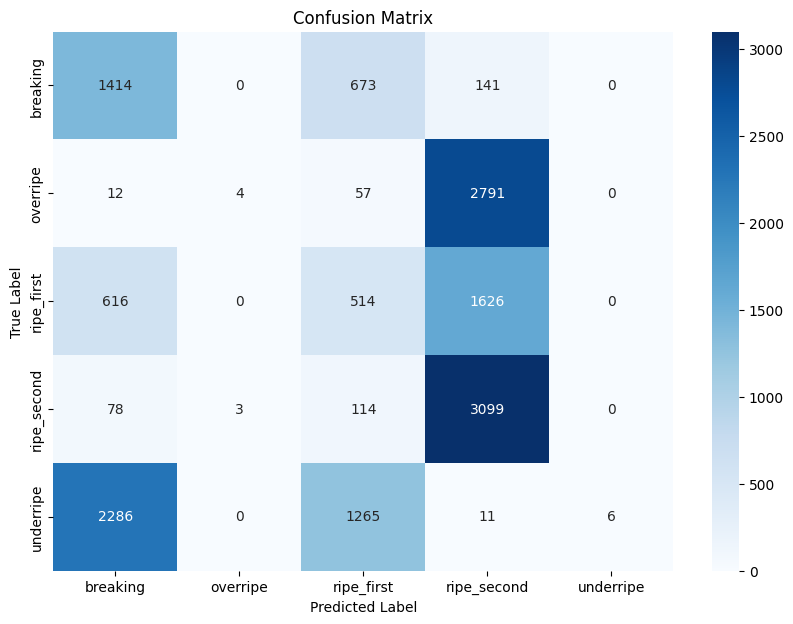

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()